<a href="https://colab.research.google.com/github/KVZyy/AI/blob/main/Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.5 MB/s eta 0:00:00


4.999999999999995


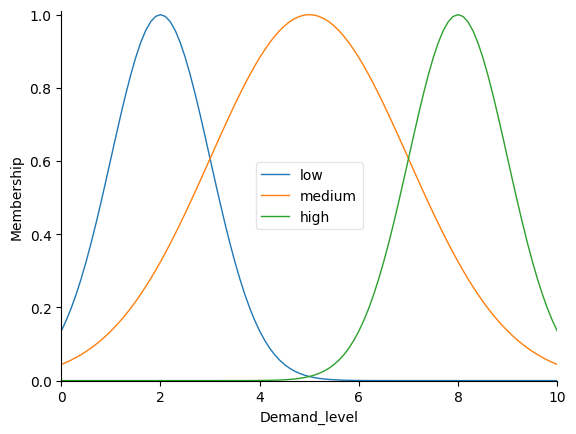

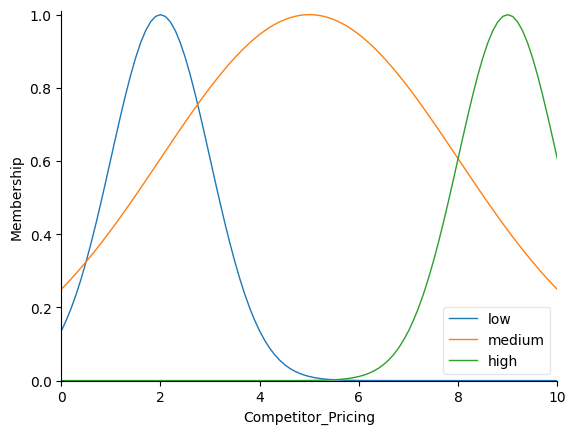

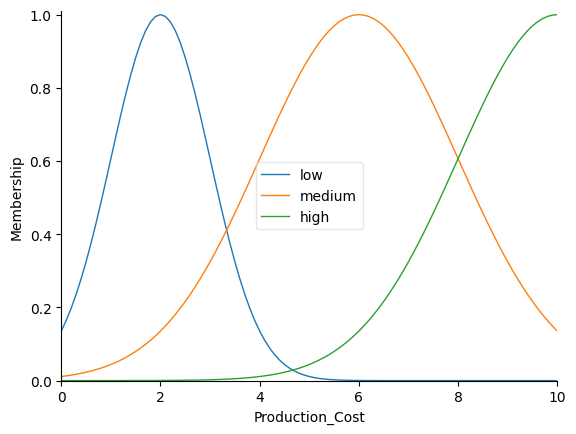

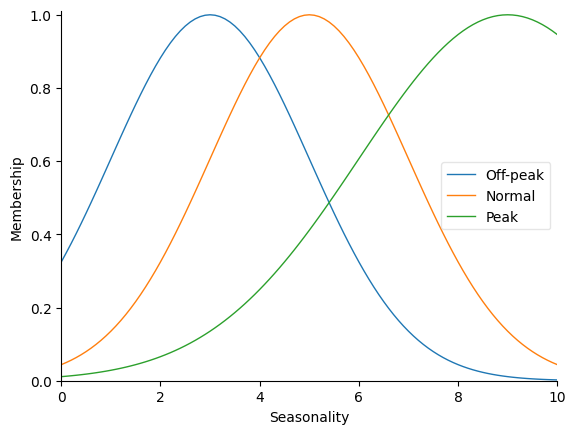

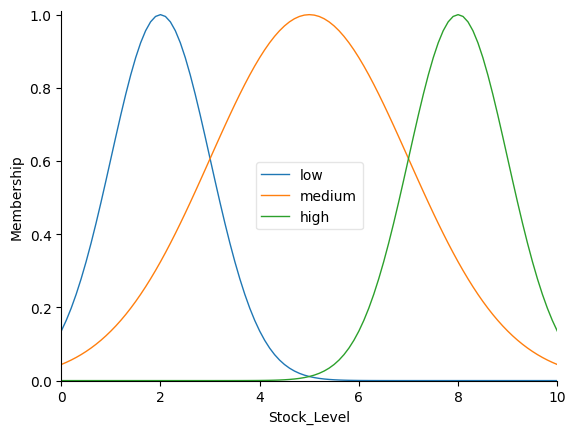

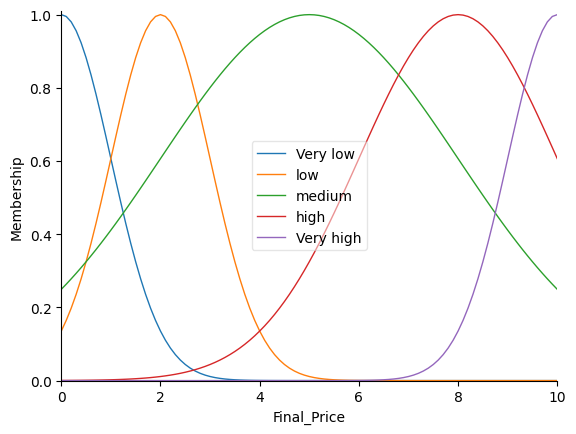

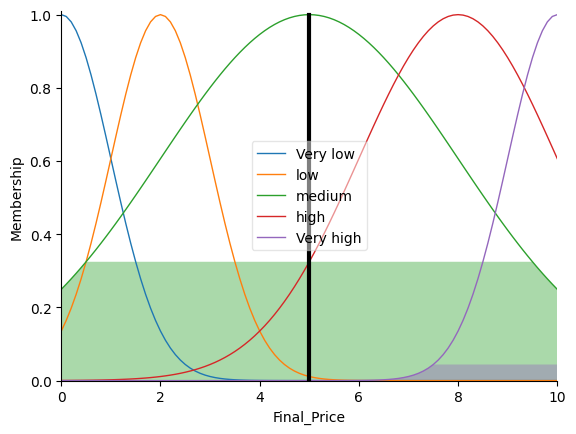

In [ ]:
from re import S
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Demand_level=ctrl.Antecedent(np.arange(0,10.1,0.1),'Demand_level')
Competitor_Pricing=ctrl.Antecedent(np.arange(0,10.1,0.1),'Competitor_Pricing')
Production_Cost=ctrl.Antecedent(np.arange(0,10.1,0.1),'Production_Cost')
Seasonality=ctrl.Antecedent(np.arange(0,10.1,0.1),'Seasonality')
Stock_Level=ctrl.Antecedent(np.arange(0,10.1,0.1),'Stock_Level')
Final_Price=ctrl.Consequent(np.arange(0,10.1,0.1),'Final_Price')

Demand_level['low']=fuzz.gaussmf(Demand_level.universe,2,1)
Demand_level['medium']=fuzz.gaussmf(Demand_level.universe,5,2)
Demand_level['high']=fuzz.gaussmf(Demand_level.universe,8,1)

Competitor_Pricing['low']=fuzz.gaussmf(Competitor_Pricing.universe,2,1)
Competitor_Pricing['medium']=fuzz.gaussmf(Competitor_Pricing.universe,5,3)
Competitor_Pricing['high']=fuzz.gaussmf(Competitor_Pricing.universe,9,1)

Production_Cost['low']=fuzz.gaussmf(Production_Cost.universe,2,1)
Production_Cost['medium']=fuzz.gaussmf(Production_Cost.universe,6,2)
Production_Cost['high']=fuzz.gaussmf(Production_Cost.universe,10,2)

Seasonality['Off-peak']=fuzz.gaussmf(Seasonality.universe,3,2)
Seasonality['Normal']=fuzz.gaussmf(Seasonality.universe,5,2)
Seasonality['Peak']=fuzz.gaussmf(Seasonality.universe,9,3)

Stock_Level['low']=fuzz.gaussmf(Stock_Level.universe,2,1)
Stock_Level['medium']=fuzz.gaussmf(Stock_Level.universe,5,2)
Stock_Level['high']=fuzz.gaussmf(Stock_Level.universe,8,1)

Final_Price['Very low']=fuzz.gaussmf(Final_Price.universe,0,1)
Final_Price['low']=fuzz.gaussmf(Final_Price.universe,2,1)
Final_Price['medium']=fuzz.gaussmf(Final_Price.universe,5,3)
Final_Price['high']=fuzz.gaussmf(Final_Price.universe,8,2)
Final_Price['Very high']=fuzz.gaussmf(Final_Price.universe,10,1)

Demand_level.view()
Competitor_Pricing.view()
Production_Cost.view()
Seasonality.view()
Stock_Level.view()
Final_Price.view()

rule1=ctrl.Rule(Demand_level['high']&Competitor_Pricing['high']&Stock_Level['low'],Final_Price['Very high'])
rule2=ctrl.Rule(Demand_level['high']&Seasonality['Peak']&Stock_Level['low'],Final_Price['Very high'])
rule3=ctrl.Rule(Demand_level['medium']&Production_Cost['high']&Stock_Level['low'],Final_Price['Very high'])
rule4=ctrl.Rule(Demand_level['high']&Competitor_Pricing['medium']&Stock_Level['medium'],Final_Price['high'])
rule5=ctrl.Rule(Demand_level['medium']&Competitor_Pricing['high']&Stock_Level['low'],Final_Price['high'])
rule6=ctrl.Rule(Demand_level['high']&Seasonality['Peak']&Stock_Level['medium'],Final_Price['high'])
rule7=ctrl.Rule(Demand_level['medium']&Competitor_Pricing['medium']&Stock_Level['medium'],Final_Price['medium'])
rule8=ctrl.Rule(Demand_level['low']&Competitor_Pricing['high']&Stock_Level['medium'],Final_Price['medium'])
rule9=ctrl.Rule(Demand_level['medium']&Production_Cost['medium']&Stock_Level['medium'],Final_Price['medium'])
rule10=ctrl.Rule(Demand_level['low']&Competitor_Pricing['low']&Stock_Level['high'],Final_Price['low'])
rule11=ctrl.Rule(Demand_level['low']&Seasonality['Off-peak']&Stock_Level['high'],Final_Price['low'])
rule12=ctrl.Rule(Demand_level['medium']&Production_Cost['low']&Stock_Level['high'],Final_Price['low'])

Final_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12])
Final=ctrl.ControlSystemSimulation(Final_ctrl)
Final.input['Demand_level']=2
Final.input['Competitor_Pricing']=1
Final.input['Production_Cost']=5
Final.input['Seasonality']=8
Final.input['Stock_Level']=2
Final.compute()
print(Final.output['Final_Price'])
Final_Price.view(sim=Final)

50.79629009461982
49.462638445469


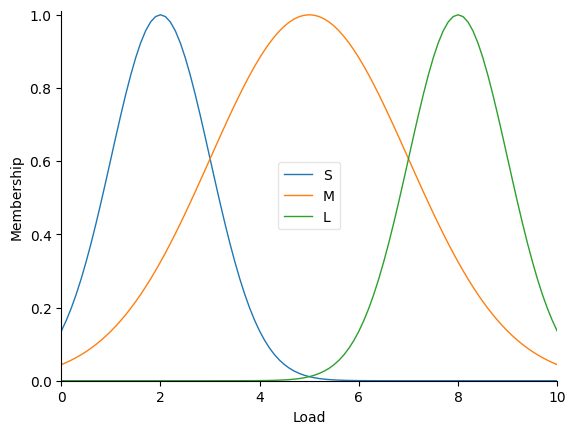

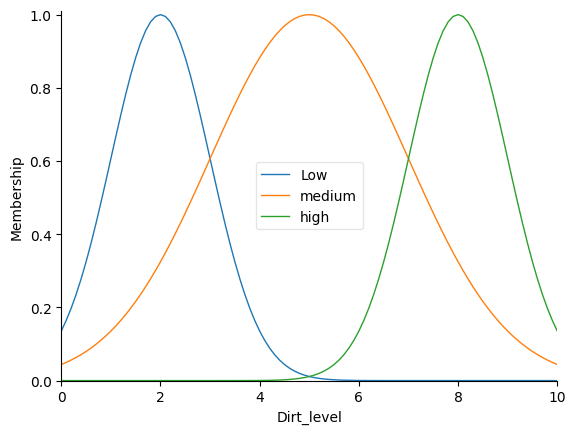

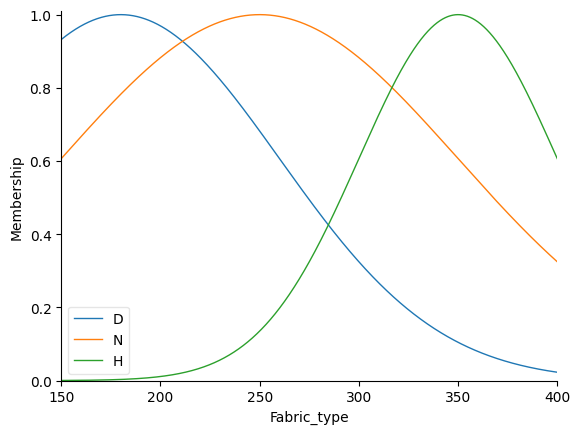

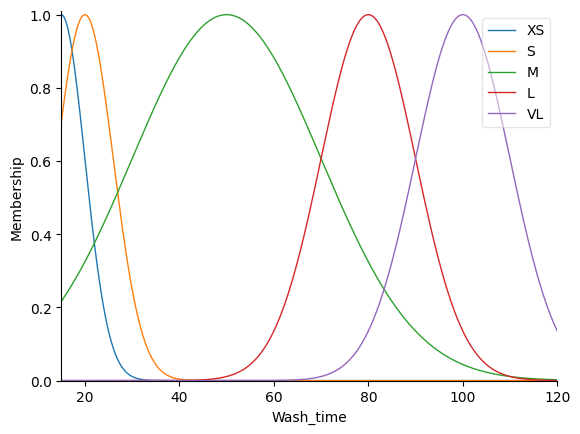

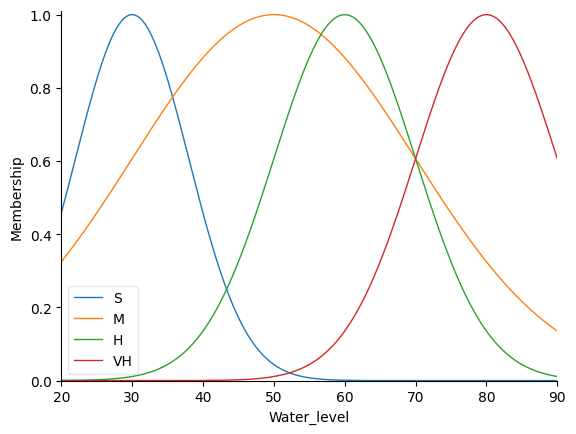

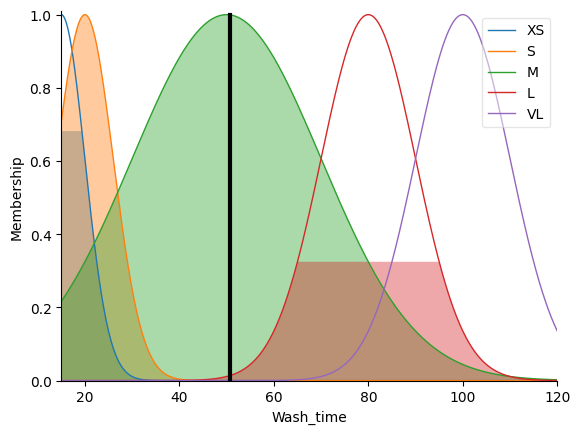

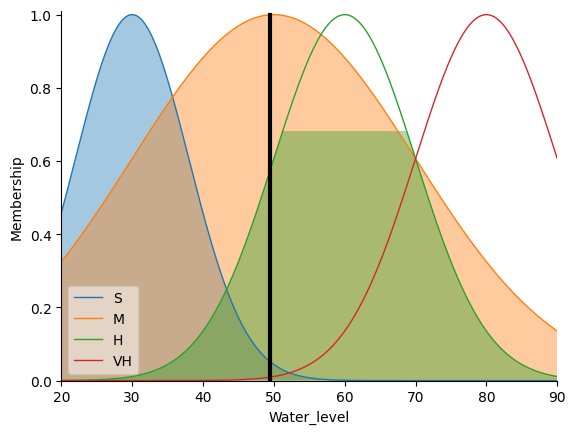

In [ ]:
from ast import Load
from re import S
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Load=ctrl.Antecedent(np.arange(0,10.1,0.1),'Load')
Dirt_level=ctrl.Antecedent(np.arange(0,10.1,0.1),'Dirt_level')
Fabric_type=ctrl.Antecedent(np.arange(150,400.1,0.1),'Fabric_type')
Wash_time=ctrl.Consequent(np.arange(15,120.1,0.1),'Wash_time')
Water_level=ctrl.Consequent(np.arange(20,90.1,0.1),'Water_level')

Load['S']=fuzz.gaussmf(Load.universe,2,1)
Load['M']=fuzz.gaussmf(Load.universe,5,2)
Load['L']=fuzz.gaussmf(Load.universe,8,1)

Dirt_level['Low']=fuzz.gaussmf(Dirt_level.universe,2,1)
Dirt_level['medium']=fuzz.gaussmf(Dirt_level.universe,5,2)
Dirt_level['high']=fuzz.gaussmf(Dirt_level.universe,8,1)

Fabric_type['D']=fuzz.gaussmf(Fabric_type.universe,180,80)
Fabric_type['N']=fuzz.gaussmf(Fabric_type.universe,250,100)
Fabric_type['H']=fuzz.gaussmf(Fabric_type.universe,350,50)

Wash_time['XS']=fuzz.gaussmf(Wash_time.universe,15,5)
Wash_time['S']=fuzz.gaussmf(Wash_time.universe,20,6)
Wash_time['M']=fuzz.gaussmf(Wash_time.universe,50,20)
Wash_time['L']=fuzz.gaussmf(Wash_time.universe,80,10)
Wash_time['VL']=fuzz.gaussmf(Wash_time.universe,100,10)

Water_level['S']=fuzz.gaussmf(Water_level.universe,30,8)
Water_level['M']=fuzz.gaussmf(Water_level.universe,50,20)
Water_level['H']=fuzz.gaussmf(Water_level.universe,60,10)
Water_level['VH']=fuzz.gaussmf(Water_level.universe,80,10)

Load.view()
Dirt_level.view()
Fabric_type.view()
Wash_time.view()
Water_level.view()

rule1=ctrl.Rule(Load['S']&Dirt_level['Low'],(Wash_time['S'],Water_level['S']))
rule2=ctrl.Rule(Load['S']&Dirt_level['medium'],(Wash_time['M'],Water_level['M']))
rule3=ctrl.Rule(Load['S']&Dirt_level['high'],(Wash_time['L'],Water_level['M']))
rule4=ctrl.Rule(Load['M']&Dirt_level['Low'],(Wash_time['M'],Water_level['M']))
rule5=ctrl.Rule(Load['M']&Dirt_level['medium'],(Wash_time['L'],Water_level['M']))
rule6=ctrl.Rule(Load['M']&Dirt_level['high'],(Wash_time['L'],Water_level['H']))
rule7=ctrl.Rule(Load['L']&Dirt_level['Low'],(Wash_time['M'],Water_level['H']))
rule8=ctrl.Rule(Load['L']&Dirt_level['medium'],(Wash_time['L'],Water_level['H']))
rule9=ctrl.Rule(Load['L']&Dirt_level['high'],(Wash_time['L'],Water_level['H']))
rule10=ctrl.Rule(Fabric_type['D'],(Wash_time['S'],Water_level['S']))
rule11=ctrl.Rule(Fabric_type['N'],(Wash_time['M'],Water_level['M']))
rule12=ctrl.Rule(Fabric_type['H'],(Wash_time['L'],Water_level['H']))
rule13=ctrl.Rule(Load['L']&Dirt_level['high']&Fabric_type['H'],(Wash_time['VL'],Water_level['VH']))
rule14=ctrl.Rule(Load['S']&Dirt_level['Low']&Fabric_type['D'],(Wash_time['XS'],Water_level['H']))
rule15=ctrl.Rule(Load['M']&Dirt_level['medium']&Fabric_type['N'],(Wash_time['M'],Water_level['M']))

R_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
R=ctrl.ControlSystemSimulation(R_ctrl)
R.input['Load']=2
R.input['Dirt_level']=2
R.input['Fabric_type']=250
R.compute()
print(R.output['Wash_time'])
print(R.output['Water_level'])
Wash_time.view(sim=R)
Water_level.view(sim=R)

55.213476587314915
58.685593923969456


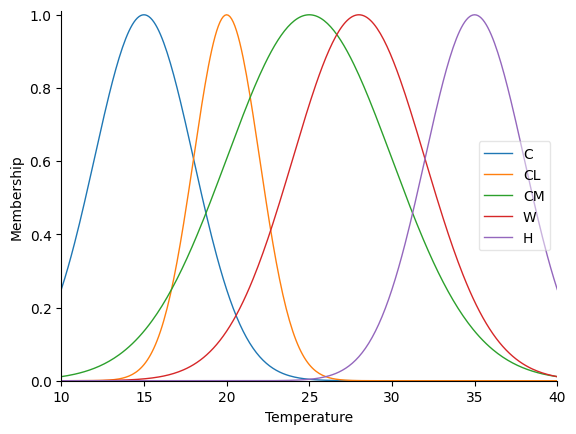

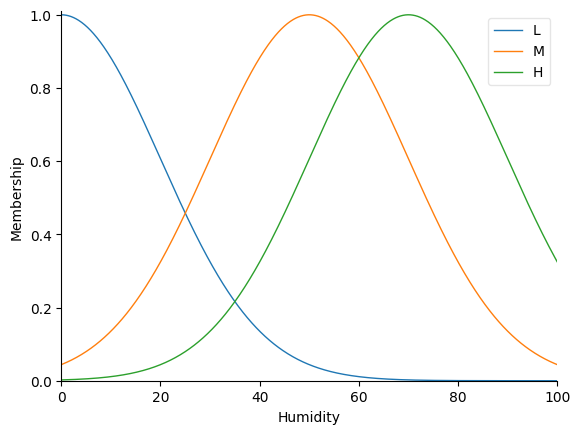

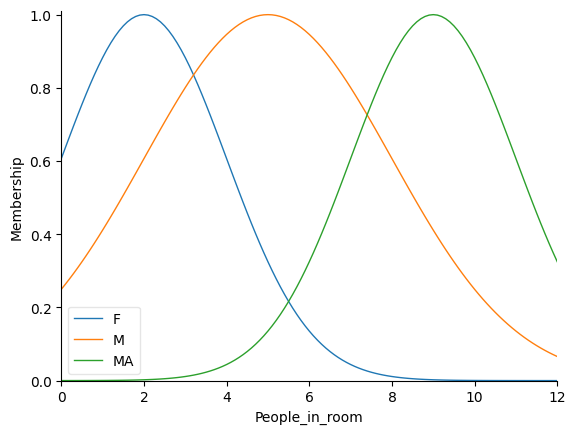

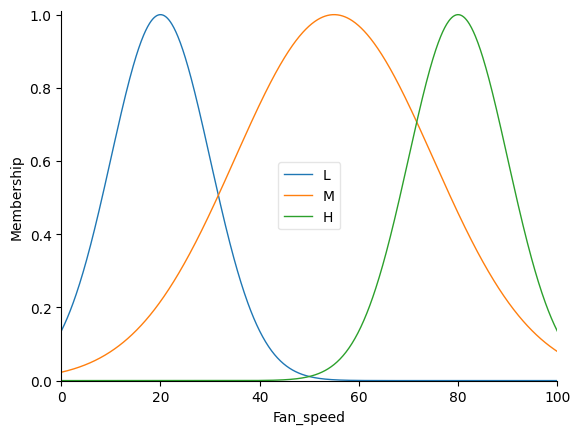

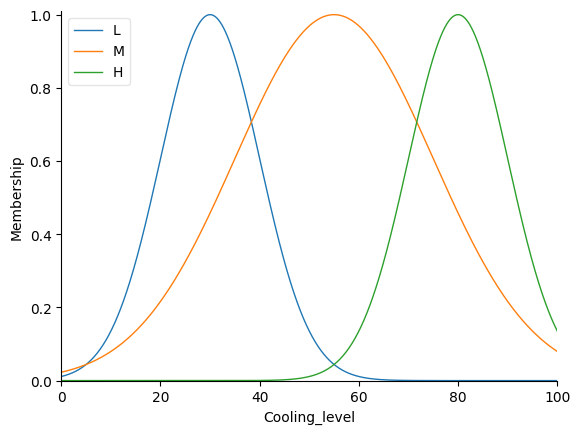

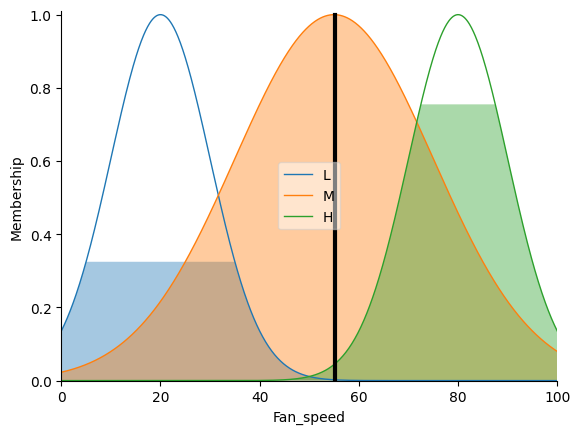

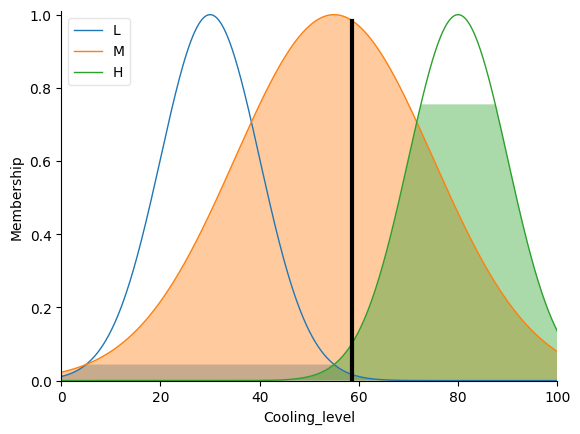

In [ ]:
from re import S
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Temperature=ctrl.Antecedent(np.arange(10,40.1,0.1),'Temperature')
Humidity=ctrl.Antecedent(np.arange(0,100.1,0.1),'Humidity')
People_in_room=ctrl.Antecedent(np.arange(0,12.1,0.1),'People_in_room')
Fan_speed=ctrl.Consequent(np.arange(0,100.1,0.1),'Fan_speed')
Cooling_level=ctrl.Consequent(np.arange(0,100.1,0.1),'Cooling_level')

Temperature['C']=fuzz.gaussmf(Temperature.universe,15,3)
Temperature['CL']=fuzz.gaussmf(Temperature.universe,20,2)
Temperature['CM']=fuzz.gaussmf(Temperature.universe,25,5)
Temperature['W']=fuzz.gaussmf(Temperature.universe,28,4)
Temperature['H']=fuzz.gaussmf(Temperature.universe,35,3)

Humidity['L']=fuzz.gaussmf(Humidity.universe,0,20)
Humidity['M']=fuzz.gaussmf(Humidity.universe,50,20)
Humidity['H']=fuzz.gaussmf(Humidity.universe,70,20)

People_in_room['F']=fuzz.gaussmf(People_in_room.universe,2,2)
People_in_room['M']=fuzz.gaussmf(People_in_room.universe,5,3)
People_in_room['MA']=fuzz.gaussmf(People_in_room.universe,9,2)

Fan_speed['L']=fuzz.gaussmf(Fan_speed.universe,20,10)
Fan_speed['M']=fuzz.gaussmf(Fan_speed.universe,55,20)
Fan_speed['H']=fuzz.gaussmf(Fan_speed.universe,80,10)

Cooling_level['L']=fuzz.gaussmf(Cooling_level.universe,30,10)
Cooling_level['M']=fuzz.gaussmf(Cooling_level.universe,55,20)
Cooling_level['H']=fuzz.gaussmf(Cooling_level.universe,80,10)

Temperature.view()
Humidity.view()
People_in_room.view()
Fan_speed.view()
Cooling_level.view()

rule1=ctrl.Rule(Temperature['C'],Fan_speed['L'])
rule2=ctrl.Rule(Temperature['CL'],Fan_speed['L'])
rule3=ctrl.Rule(Temperature['CM'],Fan_speed['M'])
rule4=ctrl.Rule(Temperature['W'],Fan_speed['H'])
rule5=ctrl.Rule(Temperature['H'],Fan_speed['H'])
rule6=ctrl.Rule(Temperature['C'],Cooling_level['L'])
rule7=ctrl.Rule(Temperature['CL'],Cooling_level['L'])
rule8=ctrl.Rule(Temperature['CM'],Cooling_level['M'])
rule9=ctrl.Rule(Temperature['W'],Cooling_level['H'])
rule10=ctrl.Rule(Temperature['H'],Cooling_level['H'])
rule11=ctrl.Rule(Humidity['L'],Cooling_level['L'])
rule12=ctrl.Rule(Humidity['M'],Cooling_level['M'])
rule13=ctrl.Rule(Humidity['H'],Cooling_level['H'])
rule14=ctrl.Rule(People_in_room['F'],Fan_speed['L'])
rule15=ctrl.Rule(People_in_room['M'],Fan_speed['M'])
rule16=ctrl.Rule(People_in_room['MA'],Fan_speed['H'])
rule17=ctrl.Rule(Temperature['H']&Humidity['H']&People_in_room['MA'],(Cooling_level['H'],Fan_speed['H']))
rule18=ctrl.Rule(Temperature['CM']&Humidity['M']&People_in_room['M'],(Cooling_level['M'],Fan_speed['M']))
rule19=ctrl.Rule(Temperature['CL']&Humidity['L']&People_in_room['F'],(Cooling_level['L'],Fan_speed['L']))

R_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19])
R=ctrl.ControlSystemSimulation(R_ctrl)
R.input['Temperature']=25
R.input['Humidity']=50
R.input['People_in_room']=5
R.compute()
print(R.output['Fan_speed'])
print(R.output['Cooling_level'])
Fan_speed.view(sim=R)
Cooling_level.view(sim=R)

13.324565170065258
41.06213585494698


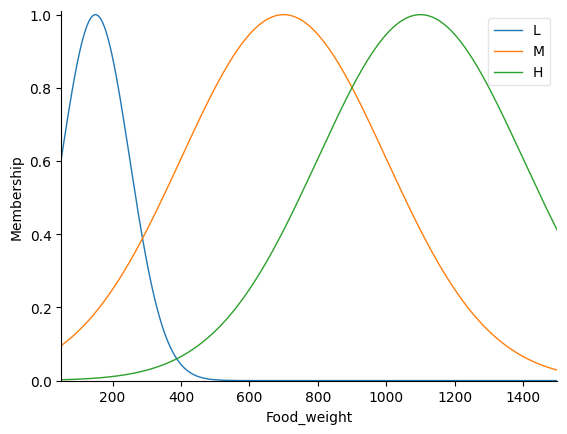

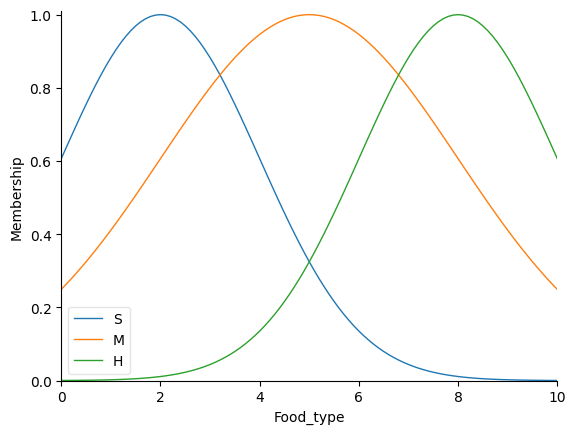

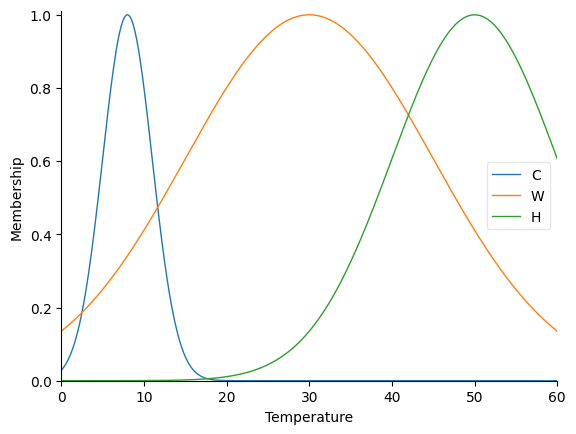

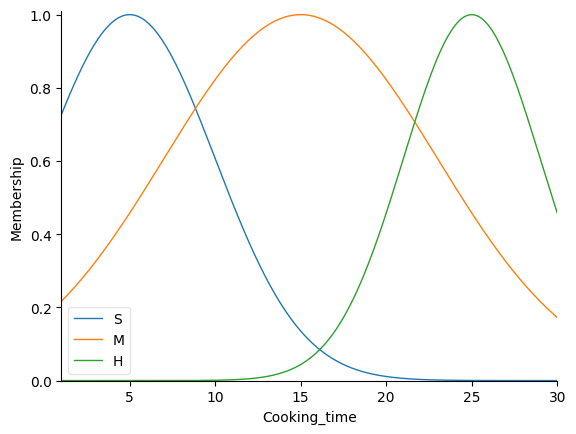

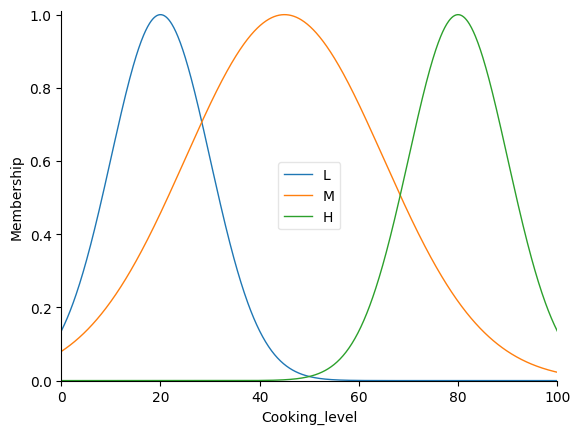

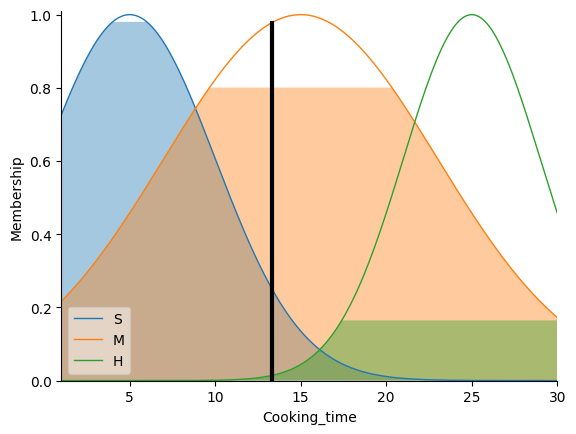

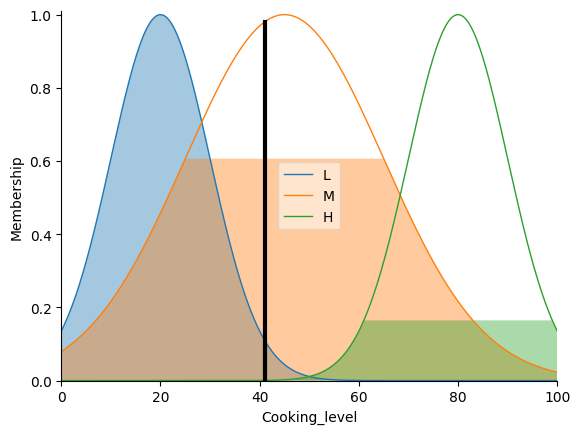

In [ ]:
from re import S
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Food_weight=ctrl.Antecedent(np.arange(50,1500.1,0.1),'Food_weight')
Food_type=ctrl.Antecedent(np.arange(0,10.1,0.1),'Food_type')
Temperature=ctrl.Antecedent(np.arange(0,60.1,0.1),'Temperature')
Cooking_time=ctrl.Consequent(np.arange(1,30.1,0.1),'Cooking_time')
Cooking_level=ctrl.Consequent(np.arange(0,100.1,0.1),'Cooking_level')

Food_weight['L']=fuzz.gaussmf(Food_weight.universe,150,100)
Food_weight['M']=fuzz.gaussmf(Food_weight.universe,700,300)
Food_weight['H']=fuzz.gaussmf(Food_weight.universe,1100,300)

Food_type['S']=fuzz.gaussmf(Food_type.universe,2,2)
Food_type['M']=fuzz.gaussmf(Food_type.universe,5,3)
Food_type['H']=fuzz.gaussmf(Food_type.universe,8,2)

Temperature['C']=fuzz.gaussmf(Temperature.universe,8,3)
Temperature['W']=fuzz.gaussmf(Temperature.universe,30,15)
Temperature['H']=fuzz.gaussmf(Temperature.universe,50,10)

Cooking_time['S']=fuzz.gaussmf(Cooking_time.universe,5,5)
Cooking_time['M']=fuzz.gaussmf(Cooking_time.universe,15,8)
Cooking_time['H']=fuzz.gaussmf(Cooking_time.universe,25,4)

Cooking_level['L']=fuzz.gaussmf(Cooking_level.universe,20,10)
Cooking_level['M']=fuzz.gaussmf(Cooking_level.universe,45,20)
Cooking_level['H']=fuzz.gaussmf(Cooking_level.universe,80,10)

Food_weight.view()
Food_type.view()
Temperature.view()
Cooking_time.view()
Cooking_level.view()

rule1=ctrl.Rule(Food_weight['L'],Cooking_time['S'])
rule2=ctrl.Rule(Food_weight['M'],Cooking_time['M'])
rule3=ctrl.Rule(Food_weight['H'],Cooking_time['H'])
rule4=ctrl.Rule(Food_type['S'],Cooking_level['L'])
rule5=ctrl.Rule(Food_type['M'],Cooking_level['M'])
rule6=ctrl.Rule(Food_type['H'],Cooking_level['H'])
rule7=ctrl.Rule(Temperature['C'],Cooking_time['H'])
rule8=ctrl.Rule(Temperature['W'],Cooking_time['M'])
rule9=ctrl.Rule(Temperature['H'],Cooking_time['S'])
rule10=ctrl.Rule(Temperature['H']&Food_weight['L']&Food_type['M'],(Cooking_level['L'],Cooking_time['M']))
rule11=ctrl.Rule(Temperature['W']&Food_weight['M']&Food_type['S'],(Cooking_level['H'],Cooking_time['H']))
rule12=ctrl.Rule(Temperature['C']&Food_weight['H']&Food_type['H'],(Cooking_level['H'],Cooking_time['H']))

R_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12])
R=ctrl.ControlSystemSimulation(R_ctrl)
R.input['Food_weight']=130
R.input['Food_type']=2
R.input['Temperature']=20
R.compute()
print(R.output['Cooking_time'])
print(R.output['Cooking_level'])
Cooking_time.view(sim=R)
Cooking_level.view(sim=R)

50.93336087808593
65.39213838347065
89.99999999999984


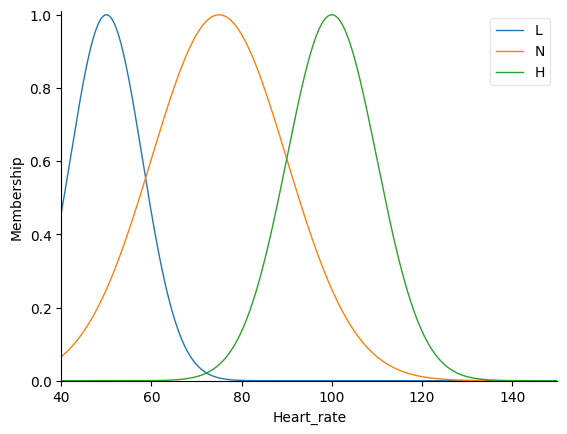

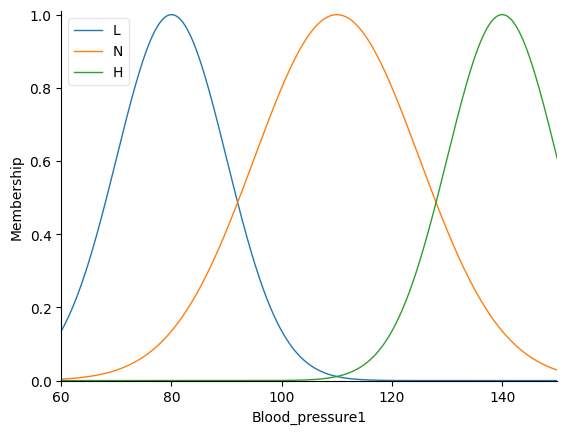

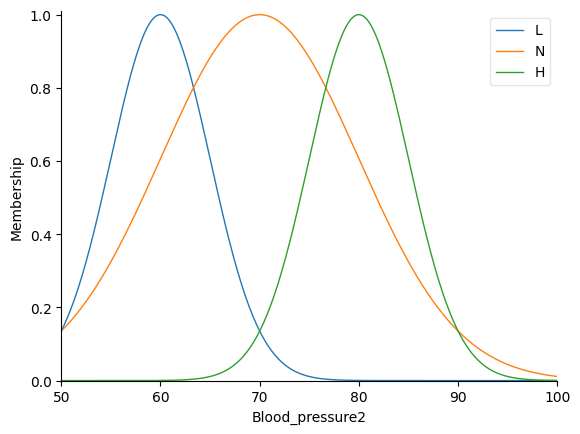

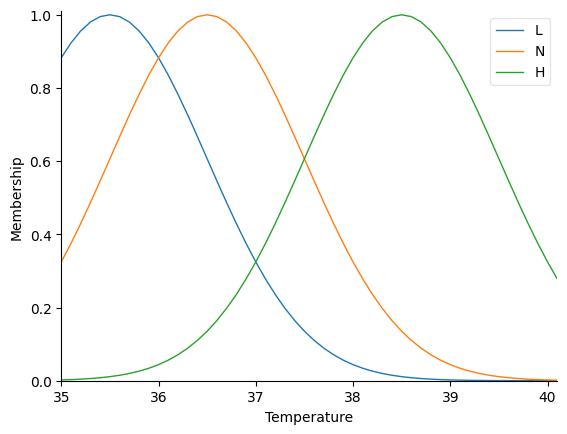

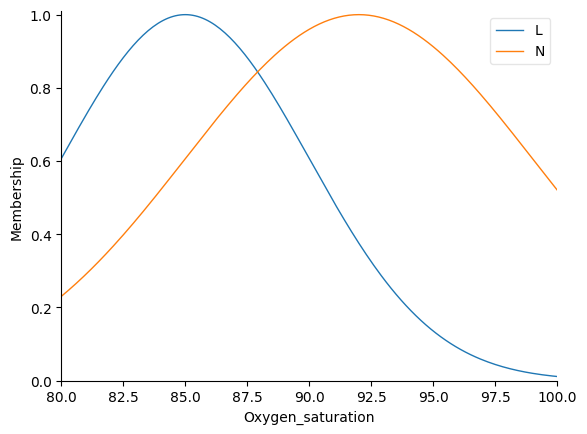

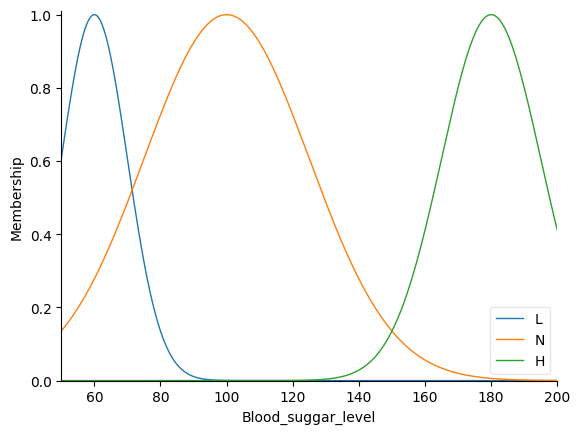

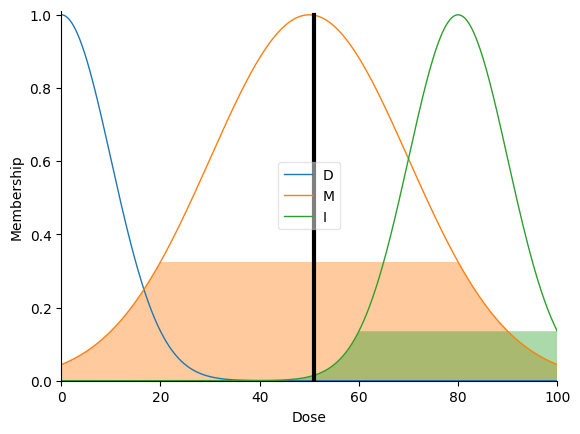

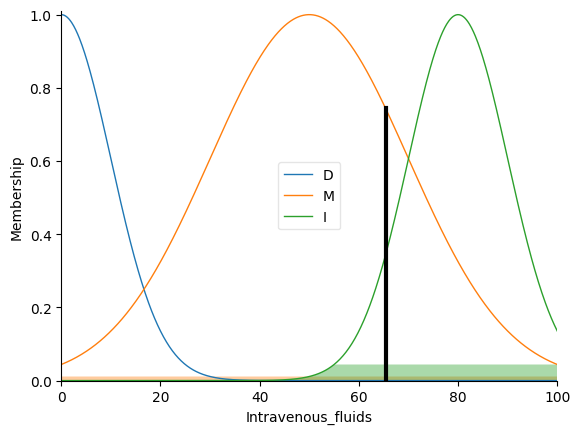

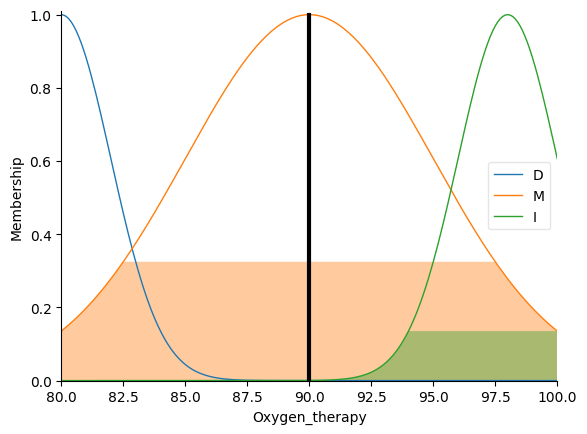

In [ ]:
from re import S
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Heart_rate=ctrl.Antecedent(np.arange(40,150.1,0.1),'Heart_rate')
Blood_pressure1=ctrl.Antecedent(np.arange(60,150.1,0.1),'Blood_pressure1')
Blood_pressure2=ctrl.Antecedent(np.arange(50,100.1,0.1),'Blood_pressure2')
Temperature=ctrl.Antecedent(np.arange(35,40.1,0.1),'Temperature')
Oxygen_saturation=ctrl.Antecedent(np.arange(80,100.1,0.1),'Oxygen_saturation')
Blood_suggar_level=ctrl.Antecedent(np.arange(50,200.1,0.1),'Blood_suggar_level')
Dose=ctrl.Consequent(np.arange(0,100.1,0.1),'Dose')
Intravenous_fluids=ctrl.Consequent(np.arange(0,100.1,0.1),'Intravenous_fluids')
Oxygen_therapy=ctrl.Consequent(np.arange(80,100.1,0.1),'Oxygen_therapy')

Heart_rate['L']=fuzz.gaussmf(Heart_rate.universe,50,8)
Heart_rate['N']=fuzz.gaussmf(Heart_rate.universe,75,15)
Heart_rate['H']=fuzz.gaussmf(Heart_rate.universe,100,10)

Blood_pressure1['L']=fuzz.gaussmf(Blood_pressure1.universe,80,10)
Blood_pressure1['N']=fuzz.gaussmf(Blood_pressure1.universe,110,15)
Blood_pressure1['H']=fuzz.gaussmf(Blood_pressure1.universe,140,10)

Blood_pressure2['L']=fuzz.gaussmf(Blood_pressure2.universe,60,5)
Blood_pressure2['N']=fuzz.gaussmf(Blood_pressure2.universe,70,10)
Blood_pressure2['H']=fuzz.gaussmf(Blood_pressure2.universe,80,5)

Temperature['L']=fuzz.gaussmf(Temperature.universe,35.5,1)
Temperature['N']=fuzz.gaussmf(Temperature.universe,36.5,1)
Temperature['H']=fuzz.gaussmf(Temperature.universe,38.5,1)

Oxygen_saturation['L']=fuzz.gaussmf(Oxygen_saturation.universe,85,5)
Oxygen_saturation['N']=fuzz.gaussmf(Oxygen_saturation.universe,92,7)

Blood_suggar_level['L']=fuzz.gaussmf(Blood_suggar_level.universe,60,10)
Blood_suggar_level['N']=fuzz.gaussmf(Blood_suggar_level.universe,100,25)
Blood_suggar_level['H']=fuzz.gaussmf(Blood_suggar_level.universe,180,15)

Dose['D']=fuzz.gaussmf(Dose.universe,0,10)
Dose['M']=fuzz.gaussmf(Dose.universe,50,20)
Dose['I']=fuzz.gaussmf(Dose.universe,80,10)

Intravenous_fluids['D']=fuzz.gaussmf(Intravenous_fluids.universe,0,10)
Intravenous_fluids['M']=fuzz.gaussmf(Intravenous_fluids.universe,50,20)
Intravenous_fluids['I']=fuzz.gaussmf(Intravenous_fluids.universe,80,10)

Oxygen_therapy['D']=fuzz.gaussmf(Oxygen_therapy.universe,80,2)
Oxygen_therapy['M']=fuzz.gaussmf(Oxygen_therapy.universe,90,5)
Oxygen_therapy['I']=fuzz.gaussmf(Oxygen_therapy.universe,98,2)

Heart_rate.view()
Blood_pressure1.view()
Blood_pressure2.view()
Temperature.view()
Oxygen_saturation.view()
Blood_suggar_level.view()

rule1=ctrl.Rule(Heart_rate['L']&Blood_pressure1['L']&Blood_pressure2['L'],(Dose['I'],Intravenous_fluids['I']))
rule2=ctrl.Rule(Heart_rate['H']&Blood_pressure1['H']&Blood_pressure2['H'],(Dose['D'],Intravenous_fluids['D']))
rule3=ctrl.Rule(Heart_rate['N']&Blood_pressure1['N']&Blood_pressure2['N'],(Dose['M'],Intravenous_fluids['M']))
rule4=ctrl.Rule(Temperature['H']&Oxygen_saturation['L'],(Oxygen_therapy['I'],Dose['I']))
rule5=ctrl.Rule(Temperature['N']&Oxygen_saturation['N'],(Oxygen_therapy['M'],Dose['M']))
rule6=ctrl.Rule(Temperature['L']&Oxygen_saturation['L'],(Oxygen_therapy['I'],Intravenous_fluids['I']))
rule7=ctrl.Rule(Blood_suggar_level['H'],Dose['I'])
rule8=ctrl.Rule(Blood_suggar_level['N'],Dose['M'])
rule9=ctrl.Rule(Blood_suggar_level['L'],Dose['D'])
rule10=ctrl.Rule(Blood_pressure1['H']&Blood_pressure2['H']&Blood_suggar_level['H']&Heart_rate['H'],Dose['D'])
rule11=ctrl.Rule(Blood_pressure1['L']&Blood_pressure2['L']&Oxygen_saturation['L']&Heart_rate['L'],(Intravenous_fluids['I'],Oxygen_therapy['I'],Dose['I']))
rule12=ctrl.Rule(Blood_pressure1['H']&Blood_pressure2['H']&Oxygen_saturation['N']&Temperature['H'],(Oxygen_therapy['M'],Dose['I']))

R_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12])
R=ctrl.ControlSystemSimulation(R_ctrl)
R.input['Heart_rate']=100
R.input['Blood_pressure1']=100
R.input['Blood_pressure2']=100
R.input['Temperature']=38
R.input['Oxygen_saturation']=95
R.input['Blood_suggar_level']=150
R.compute()
print(R.output['Dose'])
print(R.output['Intravenous_fluids'])
print(R.output['Oxygen_therapy'])
Dose.view(sim=R)
Intravenous_fluids.view(sim=R)
Oxygen_therapy.view(sim=R)

6.189944481692706


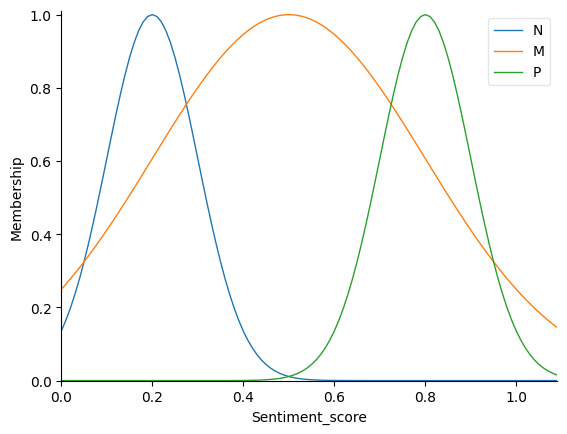

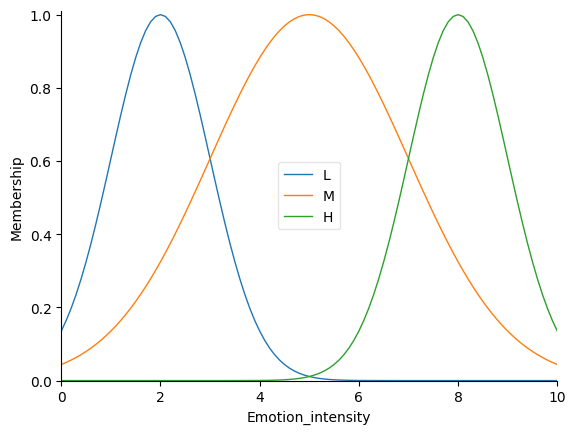

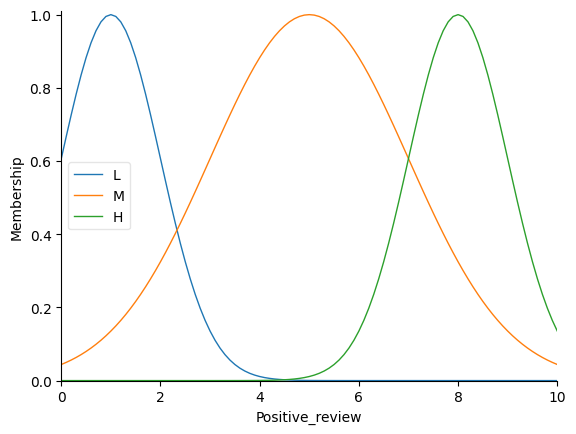

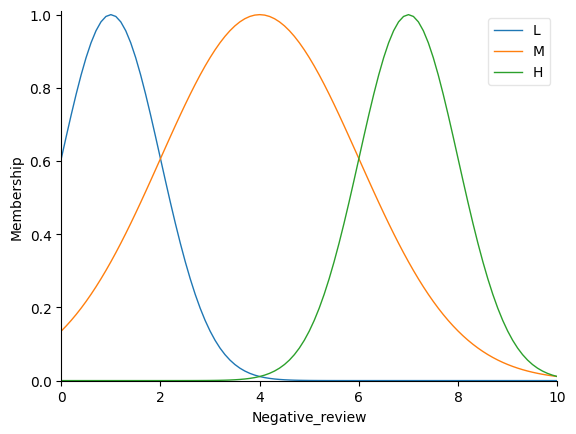

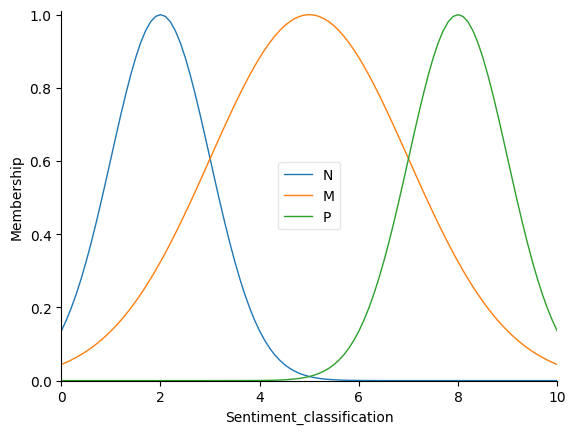

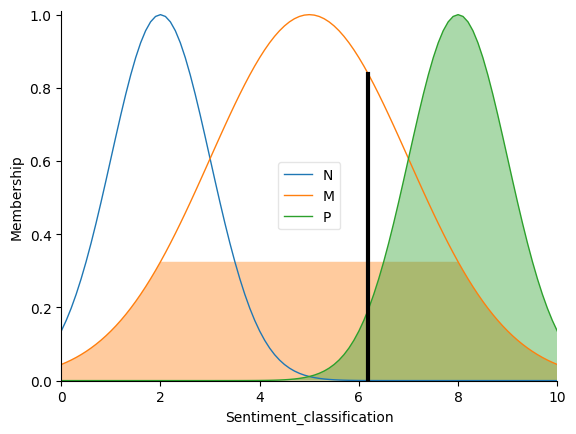

In [ ]:
from re import S
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Sentiment_score=ctrl.Antecedent(np.arange(0,1.1,0.01),'Sentiment_score')
Emotion_intensity=ctrl.Antecedent(np.arange(0,10.1,0.1),'Emotion_intensity')
Positive_review=ctrl.Antecedent(np.arange(0,10.1,0.1),'Positive_review')
Negative_review=ctrl.Antecedent(np.arange(0,10.1,0.1),'Negative_review')
Sentiment_classification=ctrl.Consequent(np.arange(0,10.1,0.1),'Sentiment_classification')

Sentiment_score['N']=fuzz.gaussmf(Sentiment_score.universe,0.2,0.1)
Sentiment_score['M']=fuzz.gaussmf(Sentiment_score.universe,0.5,0.3)
Sentiment_score['P']=fuzz.gaussmf(Sentiment_score.universe,0.8,0.1)

Emotion_intensity['L']=fuzz.gaussmf(Emotion_intensity.universe,2,1)
Emotion_intensity['M']=fuzz.gaussmf(Emotion_intensity.universe,5,2)
Emotion_intensity['H']=fuzz.gaussmf(Emotion_intensity.universe,8,1)

Positive_review['L']=fuzz.gaussmf(Positive_review.universe,1,1)
Positive_review['M']=fuzz.gaussmf(Positive_review.universe,5,2)
Positive_review['H']=fuzz.gaussmf(Positive_review.universe,8,1)

Negative_review['L']=fuzz.gaussmf(Negative_review.universe,1,1)
Negative_review['M']=fuzz.gaussmf(Negative_review.universe,4,2)
Negative_review['H']=fuzz.gaussmf(Negative_review.universe,7,1)

Sentiment_classification['N']=fuzz.gaussmf(Sentiment_classification.universe,2,1)
Sentiment_classification['M']=fuzz.gaussmf(Sentiment_classification.universe,5,2)
Sentiment_classification['P']=fuzz.gaussmf(Sentiment_classification.universe,8,1)

Sentiment_score.view()
Emotion_intensity.view()
Positive_review.view()
Negative_review.view()
Sentiment_classification.view()

rule1=ctrl.Rule(Sentiment_score['N']&Emotion_intensity['H'],Sentiment_classification['N'])
rule2=ctrl.Rule(Sentiment_score['N']&Emotion_intensity['L'],Sentiment_classification['M'])
rule3=ctrl.Rule(Sentiment_score['P']&Emotion_intensity['H'],Sentiment_classification['P'])
rule4=ctrl.Rule(Sentiment_score['M']&Emotion_intensity['M'],Sentiment_classification['M'])
rule5=ctrl.Rule(Positive_review['H']&Negative_review['L'],Sentiment_classification['P'])
rule6=ctrl.Rule(Positive_review['L']&Negative_review['H'],Sentiment_classification['N'])
rule7=ctrl.Rule(Positive_review['M']&Negative_review['M'],Sentiment_classification['M'])
rule8=ctrl.Rule(Sentiment_score['N']&Negative_review['H']&Emotion_intensity['H'],Sentiment_classification['N'])
rule9=ctrl.Rule(Sentiment_score['M']&Positive_review['M']&Emotion_intensity['M'],Sentiment_classification['M'])
rule10=ctrl.Rule(Sentiment_score['P']&Positive_review['H']&Emotion_intensity['H'],Sentiment_classification['P'])

R_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10])
R=ctrl.ControlSystemSimulation(R_ctrl)
R.input['Sentiment_score']=0.8
R.input['Emotion_intensity']=8
R.input['Positive_review']=5
R.input['Negative_review']=1
R.compute()
print(R.output['Sentiment_classification'])
Sentiment_classification.view(sim=R)

11.208623364610501
3.108535837989599
2.9776188281316567


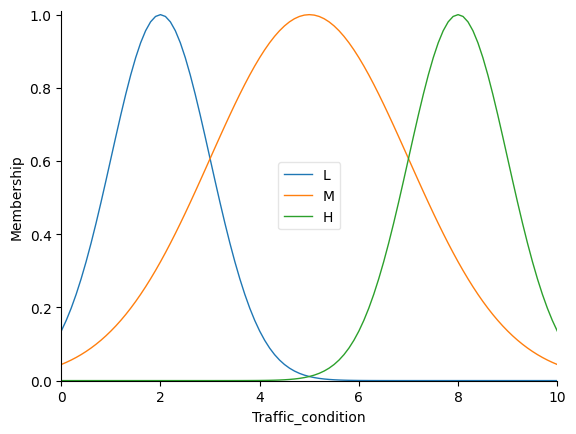

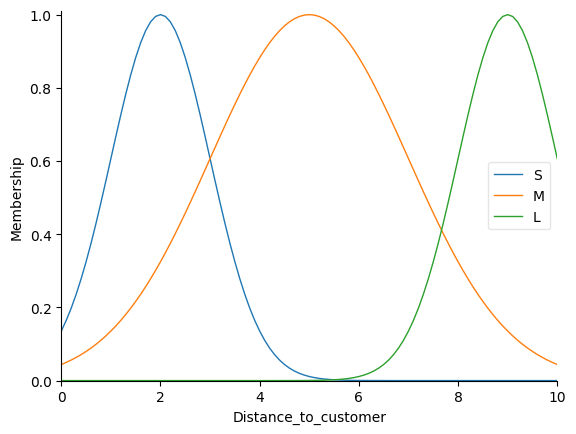

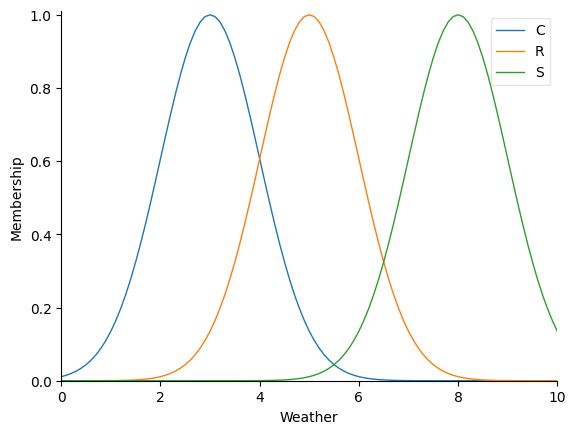

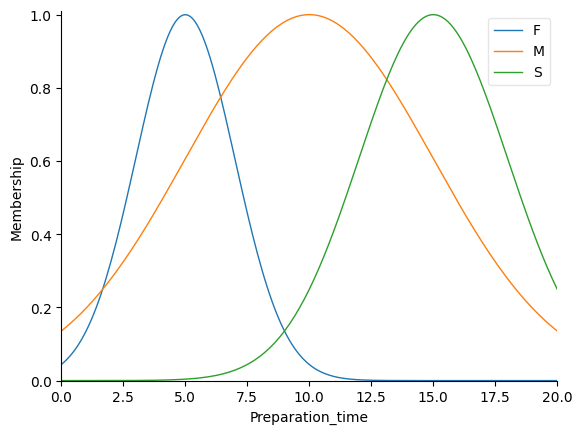

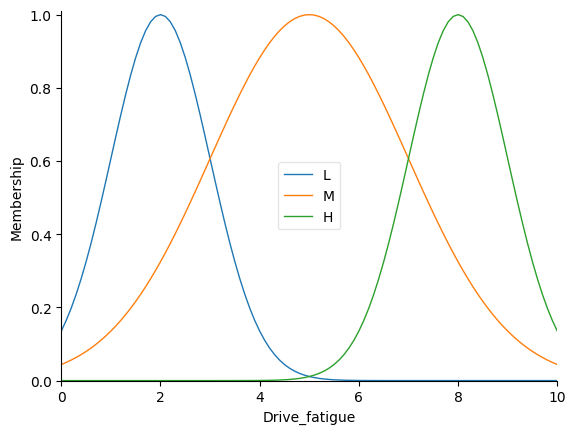

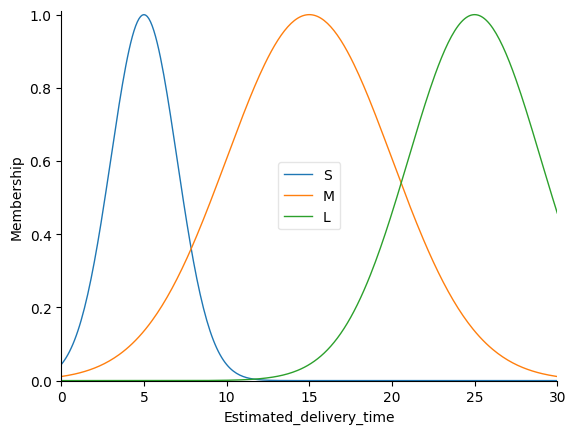

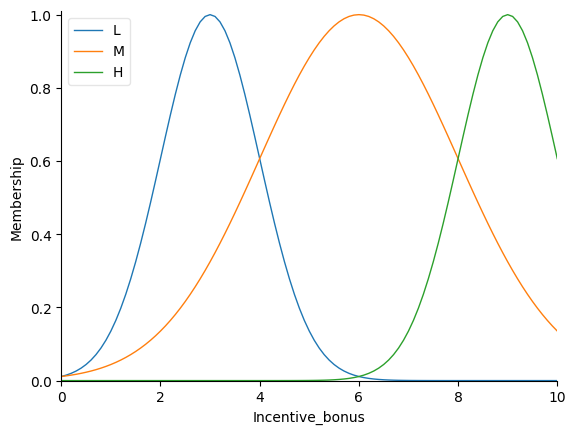

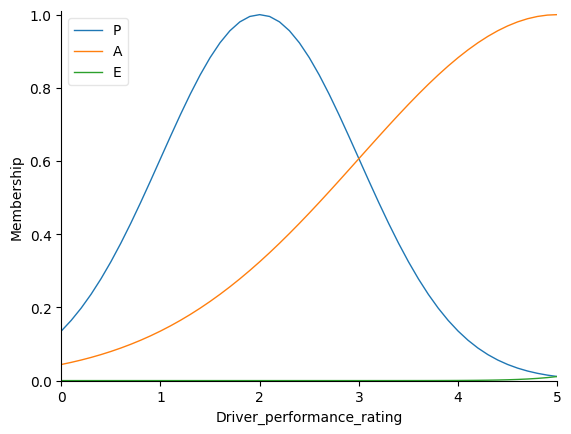

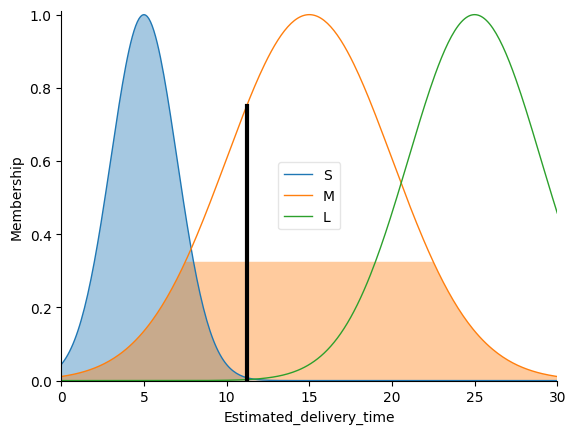

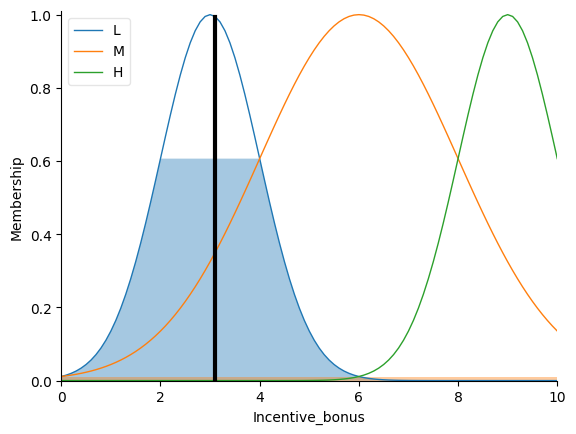

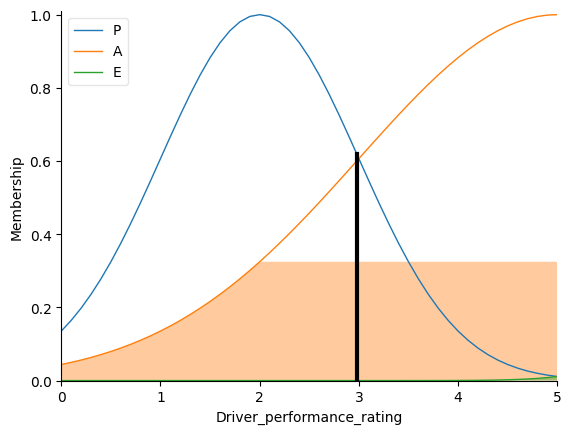

In [ ]:
from re import S
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Traffic_condition=ctrl.Antecedent(np.arange(0,10.1,0.1),'Traffic_condition')
Distance_to_customer=ctrl.Antecedent(np.arange(0,10.1,0.1),'Distance_to_customer')
Weather=ctrl.Antecedent(np.arange(0,10.1,0.1),'Weather')
Preparation_time=ctrl.Antecedent(np.arange(0,20.1,0.1),'Preparation_time')
Driver_fatigue=ctrl.Antecedent(np.arange(0,10.1,0.1),'Drive_fatigue')
Estimated_delivery_time=ctrl.Consequent(np.arange(0,30.1,0.1),'Estimated_delivery_time')
Incentive_bonus=ctrl.Consequent(np.arange(0,10.1,0.1),'Incentive_bonus')
Driver_performance_rating=ctrl.Consequent(np.arange(0,5.1,0.1),'Driver_performance_rating')

Traffic_condition['L']=fuzz.gaussmf(Traffic_condition.universe,2,1)
Traffic_condition['M']=fuzz.gaussmf(Traffic_condition.universe,5,2)
Traffic_condition['H']=fuzz.gaussmf(Traffic_condition.universe,8,1)

Distance_to_customer['S']=fuzz.gaussmf(Distance_to_customer.universe,2,1)
Distance_to_customer['M']=fuzz.gaussmf(Distance_to_customer.universe,5,2)
Distance_to_customer['L']=fuzz.gaussmf(Distance_to_customer.universe,9,1)

Weather['C']=fuzz.gaussmf(Weather.universe,3,1)
Weather['R']=fuzz.gaussmf(Weather.universe,5,1)
Weather['S']=fuzz.gaussmf(Weather.universe,8,1)

Preparation_time['F']=fuzz.gaussmf(Preparation_time.universe,5,2)
Preparation_time['M']=fuzz.gaussmf(Preparation_time.universe,10,5)
Preparation_time['S']=fuzz.gaussmf(Preparation_time.universe,15,3)

Driver_fatigue['L']=fuzz.gaussmf(Driver_fatigue.universe,2,1)
Driver_fatigue['M']=fuzz.gaussmf(Driver_fatigue.universe,5,2)
Driver_fatigue['H']=fuzz.gaussmf(Driver_fatigue.universe,8,1)

Estimated_delivery_time['S']=fuzz.gaussmf(Estimated_delivery_time.universe,5,2)
Estimated_delivery_time['M']=fuzz.gaussmf(Estimated_delivery_time.universe,15,5)
Estimated_delivery_time['L']=fuzz.gaussmf(Estimated_delivery_time.universe,25,4)

Incentive_bonus['L']=fuzz.gaussmf(Incentive_bonus.universe,3,1)
Incentive_bonus['M']=fuzz.gaussmf(Incentive_bonus.universe,6,2)
Incentive_bonus['H']=fuzz.gaussmf(Incentive_bonus.universe,9,1)

Driver_performance_rating['P']=fuzz.gaussmf(Driver_performance_rating.universe,2,1)
Driver_performance_rating['A']=fuzz.gaussmf(Driver_performance_rating.universe,5,2)
Driver_performance_rating['E']=fuzz.gaussmf(Driver_performance_rating.universe,8,1)

Traffic_condition.view()
Distance_to_customer.view()
Weather.view()
Preparation_time.view()
Driver_fatigue.view()
Estimated_delivery_time.view()
Incentive_bonus.view()
Driver_performance_rating.view()

rule1=ctrl.Rule(Traffic_condition['L']&Distance_to_customer['S'],Estimated_delivery_time['S'])
rule2=ctrl.Rule(Traffic_condition['M']&Distance_to_customer['M'],Estimated_delivery_time['M'])
rule3=ctrl.Rule(Traffic_condition['H']&Distance_to_customer['L'],Estimated_delivery_time['L'])
rule4=ctrl.Rule(Weather['C'],Incentive_bonus['L'])
rule5=ctrl.Rule(Weather['R'],Incentive_bonus['M'])
rule6=ctrl.Rule(Weather['S'],Incentive_bonus['H'])
rule7=ctrl.Rule(Preparation_time['F']&Traffic_condition['L'],Estimated_delivery_time['S'])
rule8=ctrl.Rule(Preparation_time['M']&Traffic_condition['M'],Estimated_delivery_time['M'])
rule9=ctrl.Rule(Preparation_time['S']&Traffic_condition['H'],Estimated_delivery_time['L'])
rule10=ctrl.Rule(Driver_fatigue['L'],Driver_performance_rating['E'])
rule11=ctrl.Rule(Driver_fatigue['M'],Driver_performance_rating['A'])
rule12=ctrl.Rule(Driver_fatigue['H'],Driver_performance_rating['P'])
rule13=ctrl.Rule(Distance_to_customer['L']&Weather['S']&Traffic_condition['H'],(Estimated_delivery_time['L'],Incentive_bonus['H']))
rule14=ctrl.Rule(Distance_to_customer['S']&Weather['C']&Traffic_condition['L'],(Estimated_delivery_time['S'],Incentive_bonus['L']))
rule15=ctrl.Rule(Driver_fatigue['H']&Traffic_condition['H'],(Estimated_delivery_time['L'],Driver_performance_rating['P']))

R_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
R=ctrl.ControlSystemSimulation(R_ctrl)
R.input['Traffic_condition']=2
R.input['Distance_to_customer']=2
R.input['Weather']=2
R.input['Preparation_time']=2
R.input['Drive_fatigue']=2
R.compute()
print(R.output['Estimated_delivery_time'])
print(R.output['Incentive_bonus'])
print(R.output['Driver_performance_rating'])
Estimated_delivery_time.view(sim=R)
Incentive_bonus.view(sim=R)
Driver_performance_rating.view(sim=R)